# Due Dec 5, 11:59 PM
Programming Assignment
15 points
Shovon Bhowmik Nov 17 (Edited Nov 17)
Problems that has to be solved using python or matlab:

1. 
 * Make an excel sheet of the datas given for the correlation example in class. 
 * Calculate correlation coefficient and find the relationship between the datas. 
 * Also compare the result with the defined function used by python or matlab for establishing correlation between datas. 
 * Also visualize the graphical representation of the datas.



2. 
 * Collect any dataset with two variables x and y from any site. **The dataset must be atleast of 100 items.**
 * Find the predicted y value based on x using **simple linear regression equation.** 
 
 Then find 
 
 1. SSR,
 2. SSE 
 and 
 3. Coefficient of determination by calculating difference between the actual y value and the predicted y value. 
 4. Finally show the regression line based on your result graphically and find the accuracy of your model's performance.

N. B:

1) You all are requested to submit the problems in the following link:
https://drive.google.com/drive/folders/1qreLOzd0iN3ye4JfZ9S_O9O5qzTMnD-N?usp=sharing
Upload your zip file which will be named after your roll number and there will be two files inside the zip file. Both files will be in .py or .mat format

2) If I find same code, the code that will come second or next will be not accepted and he or she will get no marks in the assignment.

Please knock me if there is any question regarding the assignment.
Thank you.

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



DATASET 
> https://archive.ics.uci.edu/ml/datasets/student+performance

In [69]:
df = pd.read_csv('student-mat.csv', delimiter=';')

In [70]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [71]:
mydf = df.iloc[ : , -3:-1]

In [72]:
# G1 = Grade1
# G2 = Grade2
# 
mydf.head()

,G1,G2
0,5,6
1,5,5
2,7,8
3,15,14
4,6,10


In [73]:
dataX = mydf.iloc[ : , 0:1]
dataY = mydf.iloc[ : , 1:]

In [74]:
dataX.head()

,G1
0,5
1,5
2,7
3,15
4,6


In [75]:
dataY.head()

,G2
0,6
1,5
2,8
3,14
4,10


\begin{equation} r = ( sum((Xi - meanX) * (Yi - meanY) ) / sqrt( sum( squre( Xi - meanX) * squre(Yi - meanY) ) )) \end{equation}

In [76]:
r = ( np.sum( (dataX.values - dataX.values.mean()) * (dataY.values - dataY.values.mean()) ) / np.sqrt( np.sum( np.square(dataX.values - dataX.values.mean()) ) * np.sum( np.square(dataY.values - dataY.values.mean()) ) ) )

In [77]:
r

0.8521180663648062

In [78]:
meanX = dataX.values.mean()

In [79]:
meanY = dataY.values.mean()

In [80]:
sumOfMultiplyOfMeanXY = np.sum((dataX.values - meanX) * (dataY.values-meanY))

In [81]:
meanX

10.90886075949367

In [82]:
meanY

10.713924050632912

In [83]:
sumOfMultiplyOfMeanXY

4191.701265822785

In [84]:
np.sum( (dataX.values - dataX.values.mean()) * (dataY.values - dataY.values.mean()))

4191.701265822785

In [85]:
np.sqrt( np.sum( np.square(dataX.values - dataX.values.mean()) ) * np.sum( np.square(dataY.values - dataY.values.mean()) ) )

4919.15549180276

In [86]:
sumOfSqureOfX = np.sum(np.square(dataX.values - dataX.values.mean()))

In [87]:
sumOfSqureOfY = np.sum(np.square(dataY.values - dataY.values.mean()))

In [88]:
sqrtOfSSXY = np.sqrt( sumOfSqureOfX * sumOfSqureOfY )

In [89]:
sqrtOfSSXY

4919.15549180276

In [90]:
check_r = sumOfMultiplyOfMeanXY / sqrtOfSSXY

In [91]:
check_r

0.8521180663648062

# $$y = a + bx$$


## $$b = r * (sdY/sdX)$$

## $$a = meanY - b * meanX$$


In [92]:
b = r * (np.std(dataY.values) / dataX.values.std())

In [93]:
b

0.9656698067869525

In [94]:
np.std(dataY.values)

3.756740243888906

In [95]:
dataY.values.std()

3.756740243888906

In [96]:
a = dataY.values.mean() - ( b * dataX.values.mean())

In [97]:
a

0.1795665887468907

In [98]:
def Yprediction(x):
    return (a + (b * x))


In [99]:
# Calculating Predicted Y
predictedY = dataX.apply(Yprediction)


# print(predictedY.head())?
# print(dataY.head())


In [100]:
r == check_r

True

In [101]:
print(type(dataY), type(predictedY))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [102]:
# >>> d = {'col1': [1, 2], 'col2': [3, 4]}
# >>> df = pd.DataFrame(data=d)
# >>> df

testdf = dataY
testdf['G2_Predicted'] = predictedY

In [103]:

testdf.head()

,G2,G2_Predicted
0,6,5.007916
1,5,5.007916
2,8,6.939255
3,14,14.664614
4,10,5.973585


In [104]:
# type(testdf['G2_Predicted'].values)

In [105]:
# SSR = np.sum( testdf['G2_Predicted'].values, testdf['G2'].values.mean() )
# testdf['G2'].values.mean()
# testdf['G2_Predicted'].values
# np.sum( np.square( testdf['G2_Predicted'].values, testdf['G2'].values.mean() ) )

# np.sum(np.square(testdf['G2_Predicted'].values - testdf['G2'].values.mean()))

In [106]:
SSR = np.sum(np.square( np.subtract(testdf['G2_Predicted'].values , testdf['G2'].values.mean()) ))

In [107]:
SSE = np.sum(np.square( np.subtract(testdf['G2'].values , testdf['G2_Predicted'].values.mean()) ))

In [108]:
CoeffOfDetermination = (SSR / SSE)

In [109]:
CoeffOfDetermination

0.7261051990252965

In [110]:
np.sqrt(CoeffOfDetermination)

0.8521180663648064

In [111]:
r

0.8521180663648062

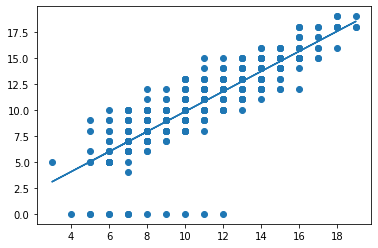

In [112]:
plt.scatter(df.G1, df.G2)
plt.plot(df.G1, testdf[['G2_Predicted']])
plt.show()

In [113]:
from sklearn import linear_model


reg = linear_model.LinearRegression()

In [114]:
reg.fit(df[['G1']], df.G2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
y_cap = reg.predict(df[['G1']])
reg.coef_

array([0.96566981])

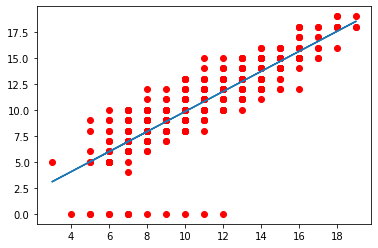

In [116]:
# %matplotlib inline

plt.scatter(df.G1,df.G2,color='red', marker='o')
plt.plot(df.G1,y_cap)
plt.show()

# Mean absolute error(MAE)

$$MAE = \frac{1}{n} \sum_{}\left\lvert{y- \hat{y}}\right\rvert$$

$$MSE = \frac{1}{n} \sum_{}{(y- \hat{y})^2}$$

$$RMSE = \sqrt{ \frac{1}{n} \sum_{}{(y- \hat{y})^2}}$$


In [117]:
# testdf.G2 - testdf.G2_Predicted

In [118]:
MAE = ( (1/len(testdf.G2)) * np.sum(abs(np.subtract(testdf.G2 , testdf.G2_Predicted))) )

In [119]:
MAE

1.3026637719467193

In [120]:
YY = testdf.G2
YY.head()
YYpredict = testdf.G2_Predicted
YYpredict.head()
# ( (1 / len(YY)) * ( np.sum(np.abs(np.subtract(YY,YYp)))) )
MSE = ( (1 / len(YY)) * ( np.sum(np.square(np.subtract(YY,YYpredict)))) )

In [121]:
MSE

3.8655039651792578

In [122]:
RMSE = np.sqrt(MSE)

In [123]:
RMSE

1.966088493730447

In [124]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(YY, YYpredict))

print(rmse)

1.9660884937304468
